## Load The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
turnstile_data = pd.concat([
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt'),    #june 1, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt'),    #june 8, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt'),    #june 15, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt'),    #june 22, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt'),    #june 29, 2019

                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190706.txt'),    #july 6, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190713.txt'),    #july 13, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190720.txt'),    #july 20, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190727.txt'),    #july 27, 2019

                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180602.txt'),    #june 2, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180609.txt'),    #june 9, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180616.txt'),    #june 16, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180623.txt'),    #june 23, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180630.txt'),    #june 30, 2018
                       
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180707.txt'),    #july 7, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180714.txt'),    #july 14, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180721.txt'),    #july 21, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180728.txt'),    #july 28, 2018

                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170603.txt'),    #june 3, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170610.txt'),    #june 10, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170617.txt'),    #june 17, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170624.txt'),    #june 24, 2017

                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170701.txt'),    #july 1, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170708.txt'),    #july 8, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170715.txt'),    #july 15, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170722.txt'),    #july 22, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170729.txt'),    #july 29, 2017
                       ])

In [3]:
turnstile_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5405519 entries, 0 to 200111
Data columns (total 11 columns):
C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64
EXITS                                                                   int64
dtypes: int64(2), obj

In [4]:
turnstile_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555


## Clean The Data

In [5]:
turnstile_data.rename(columns=lambda x: x.strip(), inplace=True)
turnstile_data = turnstile_data.rename(columns=lambda x: x.strip()) # strip the white space for each column

turnstile_data['datetime'] = turnstile_data['DATE'].str.cat(turnstile_data['TIME'],sep=" ") # combine two columns into one

turnstile_data['turnstile_id'] = turnstile_data['STATION'] + '-' + turnstile_data['C/A'] + '-' + turnstile_data['UNIT'] + '-' + turnstile_data['SCP']

turnstile_data.sort_values(['turnstile_id','datetime'],inplace = True)

turnstile_data.reset_index(drop= True,inplace = True)

turnstile_data['ac_entries'] = turnstile_data['ENTRIES'].diff() # do subtraction to get the real entries number # 
turnstile_data['ac_exits'] = turnstile_data['EXITS'].diff() # do subtraction to get the real exits number

In [6]:
turnstile_data.describe() # check the statistics of the dataframe

,ENTRIES,EXITS,ac_entries,ac_exits
count,5.405519e+06,5.405519e+06,5.405518e+06,5.405518e+06
mean,4.048916e+07,3.290394e+07,-2.723033e+00,-3.043391e+00
std,2.099989e+08,1.916148e+08,5.662509e+07,4.826536e+07
min,0.000000e+00,0.000000e+00,-2.116996e+09,-2.108758e+09
25%,4.440680e+05,1.952975e+05,6.000000e+00,5.000000e+00
50%,2.436994e+06,1.366476e+06,8.900000e+01,5.800000e+01
75%,6.840620e+06,4.734020e+06,3.390000e+02,2.340000e+02
max,2.130465e+09,2.124055e+09,2.121879e+09,2.120286e+09


In [7]:
Q3 = 2.190000e+02
Q1 = 8.000000e+00

IQR = Q3-Q1

upper_bound = Q3+2*IQR 

lower_bound = Q1-2*IQR

possible_outlier_len = len(turnstile_data[turnstile_data.ac_entries < lower_bound])+len(turnstile_data[turnstile_data.ac_entries > upper_bound])
outlier_perc = possible_outlier_len/len(turnstile_data)

d = turnstile_data[turnstile_data.ac_entries > lower_bound] # filter out outliers and get new dataframe
df = d[d.ac_entries < upper_bound]

## Compare The Traffic Of Each Station
### Stations With Most Entries

In [8]:
# choose top 10 stations with most entries
df.groupby('STATION').ac_entries.sum().sort_values(ascending = False).reset_index()[:10]

,STATION,ac_entries
0,34 ST-PENN STA,13916877.0
1,FULTON ST,9654834.0
2,23 ST,8640859.0
3,42 ST-PORT AUTH,8158303.0
4,86 ST,7866832.0
5,125 ST,7853971.0
6,TIMES SQ-42 ST,7208142.0
7,GRD CNTRL-42 ST,6939598.0
8,CANAL ST,6447491.0
9,34 ST-HERALD SQ,5958302.0


### Weekday Versus Weekend

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['day_of_week'] = df['datetime'].dt.day_name()
df['daytype'] = np.select([df.day_of_week.isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])], ['Weekday'], default='Weekend')

top_stations = df.groupby(['STATION','daytype'], as_index = False).ac_entries.sum()
top_stations = top_stations.pivot_table(index = 'STATION', columns = 'daytype', values = 'ac_entries')
top_stations['Weekday'] = top_stations['Weekday']/5
top_stations['Weekend'] = top_stations['Weekend']/2
top_stations.sort_values('Weekday', ascending = False).iloc[:25]

/Users/luyuankong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/luyuankong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/luyuankong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

daytype,Weekday,Weekend
STATION,,
34 ST-PENN STA,2148856.0,1586298.5
FULTON ST,1573770.6,892990.5
23 ST,1354106.2,935164.0
125 ST,1223971.8,867056.0
86 ST,1216295.0,892678.5
42 ST-PORT AUTH,1202111.0,1073874.0
GRD CNTRL-42 ST,1086170.4,754373.0
TIMES SQ-42 ST,1076011.4,914042.5
CANAL ST,979141.8,775891.0


### Morning Rush Versus Evening Rush

In [10]:
#split TIME into two groups: 1. rush_hour_morning (6am to 10am) 2. rush_hour_evening(4pm to 8pm) 3. regular_hour (10am to 4pm)

rush_hour_morning_df= df.set_index('datetime').between_time('06:00:00','10:00:00')

rush_hour_evening_df = df.set_index('datetime').between_time('16:00:00','20:00:00')

dfregular_hour= df.set_index('datetime').between_time('10:00:01','15:59:59')


In [11]:
m = rush_hour_morning_df.groupby('STATION')['ac_entries'].sum().sort_values(ascending=False)
e = rush_hour_evening_df.groupby('STATION')['ac_entries'].sum().sort_values(ascending=False)

In [12]:
m.get(key = '34 ST-PENN STA') 

2028351.0

In [13]:
m.get(key = 'FULTON ST') 

1139692.0

In [14]:
m.get(key = '23 ST') 

987570.0

In [15]:
m.get(key = '42 ST-PORT AUTH') 

1630649.0

In [16]:
m.get(key = 'TIMES SQ-42 ST') 

820196.0

In [17]:
e.get(key = '34 ST-PENN STA') 

7347951.0

In [18]:
e.get(key = 'FULTON ST') 

3459539.0

In [19]:
e.get(key = '23 ST') 

4078480.0

In [20]:
e.get(key = '42 ST-PORT AUTH') 

3619624.0

In [21]:
e.get(key = 'TIMES SQ-42 ST') 

3711030.0

## Data Visualization 

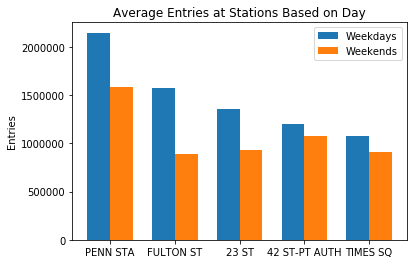

In [22]:
station_list = ['PENN STA', 'FULTON ST', '23 ST','42 ST-PT AUTH','TIMES SQ']
week_days = [2148856, 1573770, 1354106, 1202111, 1076011]
week_ends = [1586298, 892990, 935164, 1073874, 914042]

bar_graph = np.arange(len(station_list))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(bar_graph - width/2, week_days, width, label='Weekdays')
rects2 = ax.bar(bar_graph + width/2, week_ends, width, label='Weekends')

ax.set_ylabel('Entries')
ax.set_title('Average Entries at Stations Based on Day')
ax.set_xticks(bar_graph)
ax.set_xticklabels(station_list)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')




#fig.tight_layout()

plt.show()


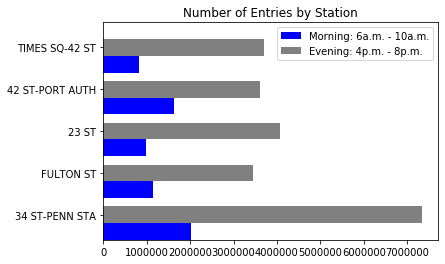

In [23]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

df_g = pandas.DataFrame(dict(graph=['34 ST-PENN STA', 'FULTON ST', '23 ST','42 ST-PORT AUTH', 'TIMES SQ-42 ST'],
                           n=[2028351.0, 1139692.0, 987570.0, 1630649.0, 820196.0],
                           m=[7347951.0, 3459539.0, 4078480.0, 3619624.0, 3711030.0])) 

ind = np.arange(len(df_g))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, df_g.n, width, color='blue', label='Morning: 6a.m. - 10a.m.')
ax.barh(ind + width, df_g.m, width, color='grey', label='Evening: 4p.m. - 8p.m.')
ax.set_title('Number of Entries by Station')

ax.set(yticks=ind + width, yticklabels=df_g.graph, ylim=[2*width - 1, len(df_g)])

ax.legend()

plt.show()
